In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Show the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# Applying K-Means clustering (let's try with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Show the results
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


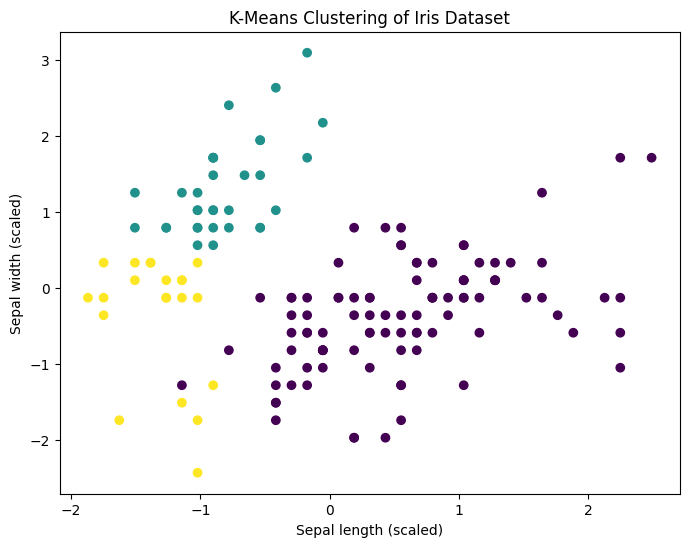

Silhouette Score: 0.4798814508199817


In [5]:
# Plotting the clusters in 2D (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

# Calculate the silhouette score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score}')
